In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import datasets
import sys

def initialize(data, k):
    centroids = []
    centroids.append(data[np.random.randint(
            data.shape[0]), :])
  
   
    for c_id in range(k - 1):
          
        dist = []
        for i in range(data.shape[0]):
            point = data[i, :]
            d = sys.maxsize
              
            for j in range(len(centroids)):
                temp_dist = (((point-centroids[j])**2).sum())**0.5
                d = min(d, temp_dist)
            dist.append(d)
              
        dist = np.array(dist)
        next_centroid = data[np.argmax(dist), :]
        centroids.append(next_centroid)
        dist = []
       
    return centroids
def kmeans(dataset, k):
    
    centroids =initialize(dataset, k)
    dic_centroids={}
    dic_centroids_old={}
    for i in range(0,k):
        dic_centroids[i]=[]
        dic_centroids_old[i]=[]
    convergio=False
    iteracion = 1
    while not convergio:
        #print("Iteracion:",iteracion)
        iteracion+=1
        classes=[]
        for i in range(0,len(dataset)):
            min_dist = np.inf
            c = -1
            for j in range(0,k):
                
                temp_dist=(((np.array(dataset[i])-np.array(centroids[j]))**2).sum())**0.5
                
                if temp_dist < min_dist:
                    c=j
                    min_dist=temp_dist
            classes.append(c)
            dic_centroids[c].append(dataset[i])
        
        iguales = True
        for i in range(0,k):
            temp = [sum(x)/len(x) for x in zip(*dic_centroids[i])]
            fin = True
            for j in range(0,len(temp)):
                if(temp[j]!=centroids[i][j]):
                    fin=False
            if not fin: 
                centroids[i]=temp
                iguales=False
            
            dic_centroids[i]=[]
        convergio=iguales   
       
       
    return centroids,classes


def elbow_method(dataset,k_inicial,k_final):
    res=[]
    dic={}
    for k in range(k_inicial,k_final+1):
        centroids,classes=kmeans(dataset,k)
        sse=0
        for i in range(0,len(dataset)):
            sse+=(np.linalg.norm(np.array(dataset[i])-np.array(centroids[classes[i]])))
        res.append(sse)
        dic[k]=[centroids,classes]
    return dic,res


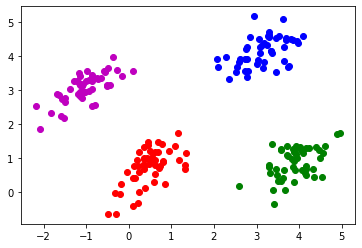

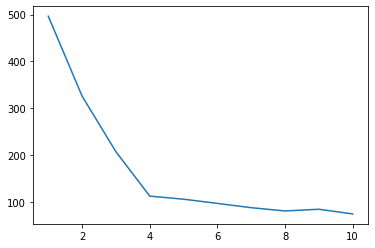

In [6]:
mean_1 = [0.5, 0.8]
cov_1 = [[0.2, 0.1], [0.1, 0.2]]
train_1 = np.random.multivariate_normal(mean_1, cov_1, 50)

x_1 = train_1[:,0]
y_1 = train_1[:,1]


mean_2 = [3, 4]
cov_2 = [[0.2, 0.1], [0.1, 0.2]]
train_2 = np.random.multivariate_normal(mean_2, cov_2, 50)

x_2 = train_2[:,0]
y_2 = train_2[:,1]
    
mean_3 = [-1, 3]
cov_3 = [[0.2, 0.1], [0.1, 0.2]]
train_3 = np.random.multivariate_normal(mean_3, cov_3, 50)

x_3 =train_3[:,0]
y_3= train_3[:,1]

mean_4 = [4, 1]
cov_4 = [[0.2, 0.1], [0.1, 0.2]]
train_4 = np.random.multivariate_normal(mean_4, cov_4, 50)

x_4 =train_4[:,0]
y_4= train_4[:,1]

plt.plot(x_1,y_1,'ro')
plt.plot(x_2,y_2,'bo')
plt.plot(x_3,y_3,'mo')
plt.plot(x_4,y_4,'go')

plt.show()
dataset=[]

for i in range(0,len(x_1)):

    dataset.append([x_1[i],y_1[i]])
    dataset.append([x_2[i],y_2[i]])
    dataset.append([x_3[i],y_3[i]])
    dataset.append([x_4[i],y_4[i]])

dic,res=elbow_method(np.array(dataset),1,10)


plt.plot(list(range(1,10+1)),res)
plt.show()



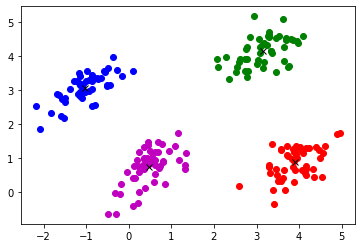

In [7]:
centroids=dic[4][0]
classes=dic[4][1]
for i in range(0,len(dataset)):
    if classes[i]== 0:
        colour='m'
    if classes[i]== 1:
        colour='g'
    if classes[i]== 2:
        colour='r'
    if classes[i]== 3:
        colour='b'
    plt.plot(dataset[i][0],dataset[i][1],colour+'o')
plt.plot(centroids[0][0],centroids[0][1],'kx')
plt.plot(centroids[1][0],centroids[1][1],'kx')
plt.plot(centroids[2][0],centroids[2][1],'kx')
plt.plot(centroids[3][0],centroids[3][1],'kx')

plt.show()

In [8]:
df=pd.read_csv("iris.csv")
df.head

<bound method NDFrame.head of      sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]>

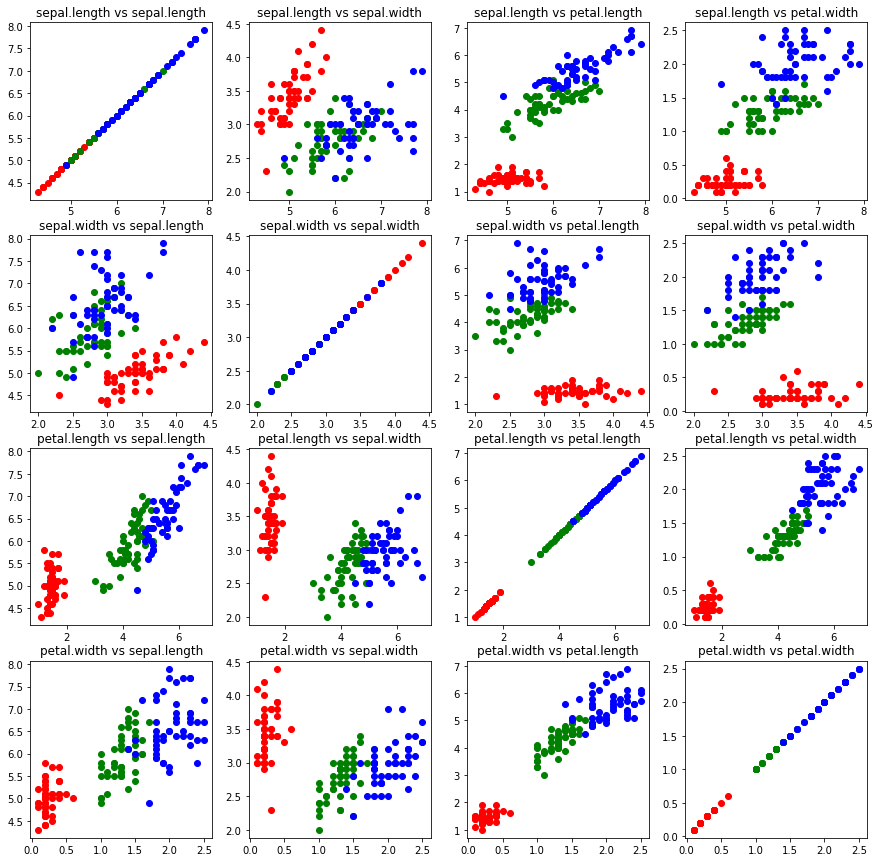

In [9]:
fig, axs = plt.subplots(len(df.columns)-1, len(df.columns)-1, figsize=(15, 15))
for i in range(0,len(df.columns)-1):
    c=df.columns[i]
    for j in range(0,len(df.columns)-1):
        d=df.columns[j]
        for k in range(0,len(df[c])):
            colour = 'g'

            if df["variety"][k] == "Setosa":
                colour = 'r'
            if df["variety"][k] == "Virginica":
                colour = 'b'

            axs[i, j].set_title(c+" vs "+d)
            axs[i, j].plot((df[c][k]),(df[d][k]),colour+'o')



plt.show()

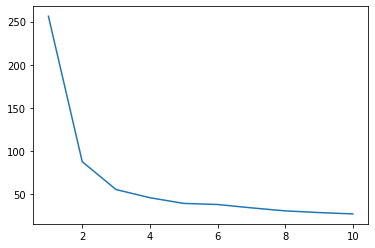

In [10]:
petal_length=list(df["petal.length"])
sepal_width=list(df["petal.width"])
dataset=list(zip(petal_length, sepal_width))
dic,res=elbow_method(np.array(dataset),1,10)


plt.plot(list(range(1,10+1)),res)
plt.show()


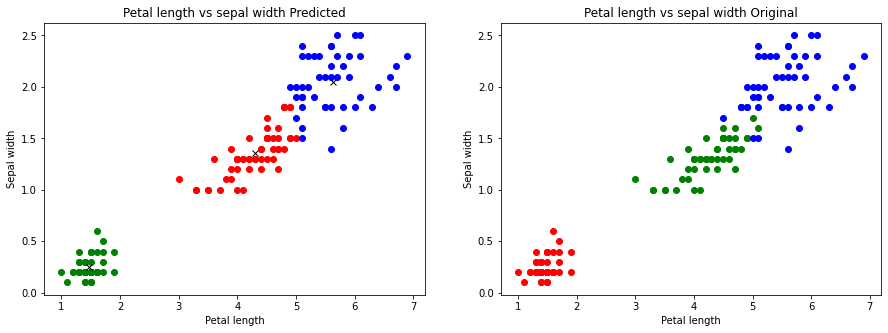

In [11]:
centroids=dic[3][0]
classes=dic[3][1]
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
for i in range(0,len(dataset)):
    colour='r'
    if classes[i]== 1:
        colour='b'
    if classes[i]== 2:
        colour='g'
    axs[0].plot(dataset[i][0],dataset[i][1],colour+'o')
axs[0].plot(centroids[0][0],centroids[0][1],'kx')
axs[0].plot(centroids[1][0],centroids[1][1],'kx')
axs[0].plot(centroids[2][0],centroids[2][1],'kx')
axs[0].set_title("Petal length vs sepal width Predicted")
for k in range(0,len(petal_length)):
    colour = 'g'

    if df["variety"][k] == "Setosa":
        colour = 'r'
    if df["variety"][k] == "Virginica":
        colour = 'b'
    axs[1].set_title("Petal length vs sepal width Original")
    axs[1].plot(petal_length[k],sepal_width[k],colour+'o')
axs[0].set_xlabel("Petal length")
axs[0].set_ylabel("Sepal width")
axs[1].set_xlabel("Petal length")
axs[1].set_ylabel("Sepal width")

plt.show()